<a href="https://colab.research.google.com/github/ElatmaniOumaima/MachineLearning/blob/main/AppleDeseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction du projet:**
La classification des maladies des pommes est une problématique cruciale dans le domaine de l'agriculture, particulièrement dans les zones rurales où l'accès à des experts agricoles peut être limité. Le projet Apple Disease Classification Using VillagePlant vise à développer une solution intelligente capable de détecter et de classifier automatiquement les maladies des pommes à partir d'images, contribuant ainsi à une meilleure gestion agricole et à une réduction des pertes.

En utilisant des algorithmes de vision par ordinateur et d'apprentissage profond, ce projet repose sur la capture et l'analyse d'images des feuilles et des fruits des pommiers pour identifier les maladies spécifiques telles que la tavelure, l'oïdium, ou encore des infections fongiques. L'intégration de ce modèle dans une application mobile ou une plateforme comme VillagePlant, dédiée à l'agriculture de précision, permettrait aux agriculteurs locaux de bénéficier d'outils accessibles, rapides et précis pour diagnostiquer les problèmes.

Le projet s'inscrit dans une démarche de transformation numérique de l'agriculture rurale, visant à :

Améliorer la productivité agricole.
Minimiser les pertes dues aux maladies non traitées.
Réduire la dépendance aux pesticides grâce à un diagnostic précoce.
Sensibiliser les agriculteurs à l'utilisation d'outils numériques.
Grâce à des techniques d'apprentissage supervisé, telles que les réseaux de neurones convolutifs (CNN), le modèle pourra être entraîné sur des jeux de données d'images de feuilles et fruits de pommes sains et malades. En combinant l'analyse technique avec des solutions pratiques pour les agriculteurs, ce projet répond à un besoin urgent dans la lutte contre les maladies agricoles dans les communautés rurales.








#**Acquisition du data & Sa présentation**



##**Présentation du dataset:**
Le dataset PlantVillage est une collection ouverte d'images conçue pour le développement de modèles d'apprentissage automatique et d'apprentissage profond dans le domaine de l'agriculture de précision. Ce jeu de données contient des images de feuilles de plantes représentant diverses maladies ainsi que des feuilles saines, ce qui en fait une ressource précieuse pour des tâches de classification et de détection des maladies.

**1. Caractéristiques principales du dataset**
* Nombre total d'images : Environ 54 306 images.
* Cultures incluses : Plus de 14 types de plantes, telles que la pomme, la tomate, le maïs, la pomme de terre, etc.
* Format des images : JPEG (haute résolution).
* Classes : Maladies spécifiques à chaque culture et feuilles saines.
* Annotations : Les images sont classées dans des répertoires par type de maladie ou de santé.

**2. Structure du dataset**
Le dataset est organisé de manière hiérarchique pour chaque culture et ses maladies. Voici un exemple de structure pour les feuilles de pommier :

 * /Apple
    * /Apple_scab
    * /Black_rot
    * /Cedar_apple_rust
    * /Healthy


* Apple_scab : Tavelure du pommier.
* Black_rot : Pourriture noire.
* Cedar_apple_rust : Rouille cèdre-pommier.
* Healthy : Feuilles saines



In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Choose kaggle.json when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oumaimaelatmani","key":"d1ff48fade488e105e25b0e14b483ec4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
govindaramsriram/sleep-time-prediction                      Sleep Time Prediction                             28KB  2024-12-28 17:08:56            941         27  1.0              
bhadramohit/customer-shopping-latest-trends-dataset         Customer Shopping (Latest Trends) Dataset         76KB  2024-11-23 15:26:12          19296        380  1.0              
hopesb/student-depression-dataset                           Student Depression Dataset.                      454KB  2024-11-22 17:56:03          15803        225  1.0              
oktayrdeki/houses-in-london                                 Houses in London                   

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:31<00:00, 162MB/s]
100% 2.04G/2.04G [00:31<00:00, 68.9MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('images')

#**Prétraitement**

##**Affichages les Statistiques  du dataset**

On extrait juste l'ensemble des images des pommes pour les traiter , c pour cela qu'on parcours tout le repertoire d'image et extraire juste ceux qui commencent par le mot "Apple", et on affiçche 3 echantillons d'images pour chaque classe.

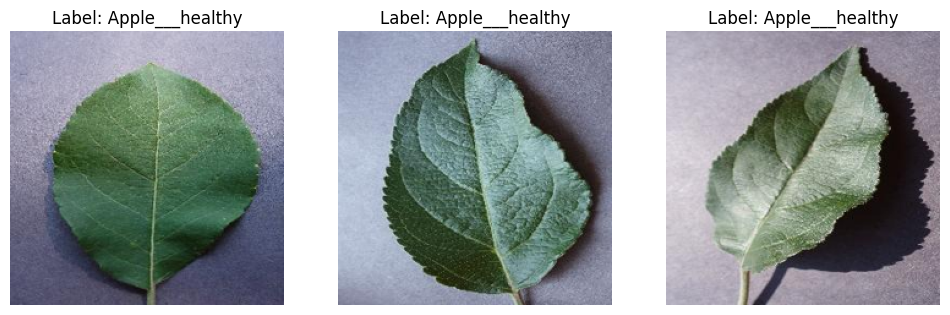

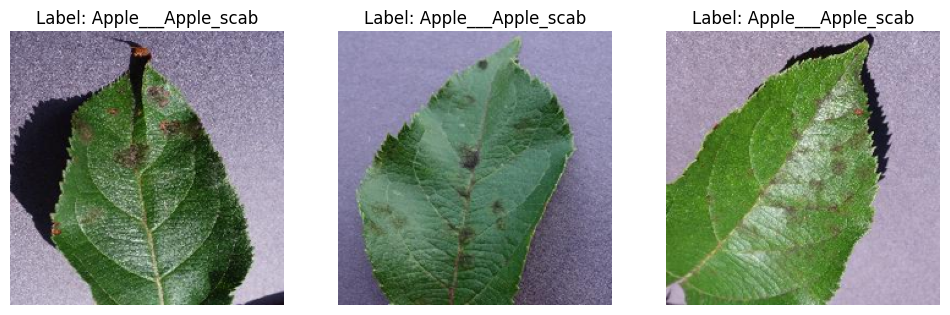

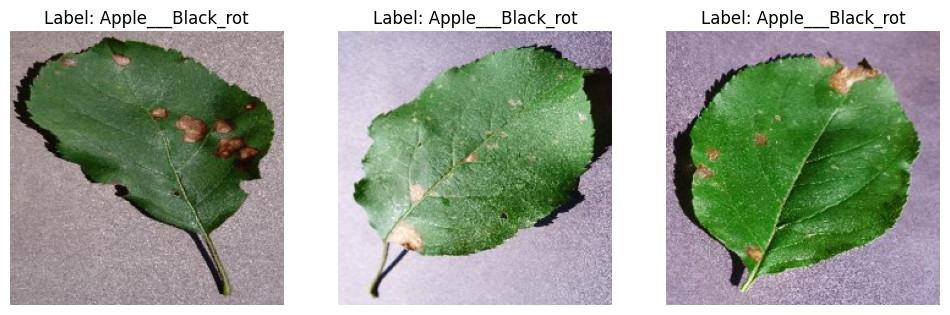

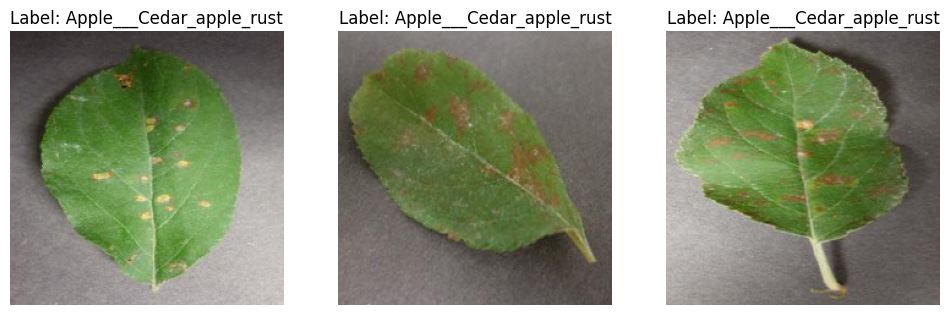

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Define the directory where your images are located
image_dir = '/content/images/plantvillage dataset/color'

# Define valid image extensions
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Loop through all subdirectories (which represent classes) and filter for those starting with "Tomato"
for folder in os.listdir(image_dir):
    if folder.startswith("Apple"):  # Filter only folders that start with "Apple"
        folder_path = os.path.join(image_dir, folder)

        # Get all image files in the folder
        images = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_extensions]

        # Pick only the first 3 images (you can change this to random if preferred)
        selected_images = images[:3]

        # Create a plot for the 3 images
        plt.figure(figsize=(12, 4))

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(folder_path, img_name)

            # Open the image and resize it
            with Image.open(img_path) as img:
                img_resized = img.resize((224, 224))
                img_array = np.array(img_resized)

            # Create a subplot for each image
            plt.subplot(1, 3, i + 1)
            plt.imshow(img_array)
            plt.title(f"Label: {folder}")
            plt.axis('off')  # Hide axis

        # Show the images for this class
        plt.show()


In [ ]:
import os
# Fetch the list of class names (folders) starting with "Apple"
apple_classes = [folder for folder in os.listdir(image_dir)
                 if os.path.isdir(os.path.join(image_dir, folder)) and folder.startswith("Apple")]

# Count the number of "Apple" classes
num_apple_classes = len(apple_classes)

# Display the results
print(f"Number of 'Apple' Classes: {num_apple_classes}")
print("Apple Class Names:")
for i, class_name in enumerate(apple_classes, 1):
    print(f"{i}. {class_name}")


Number of 'Apple' Classes: 4
Apple Class Names:
1. Apple___healthy
2. Apple___Apple_scab
3. Apple___Black_rot
4. Apple___Cedar_apple_rust


Notre dataset conteint 4 classes : healthy, apple_scab,black_Rot,apple_rust

Apple___healthy 1645
Apple___Apple_scab 630
Apple___Black_rot 621
Apple___Cedar_apple_rust 275


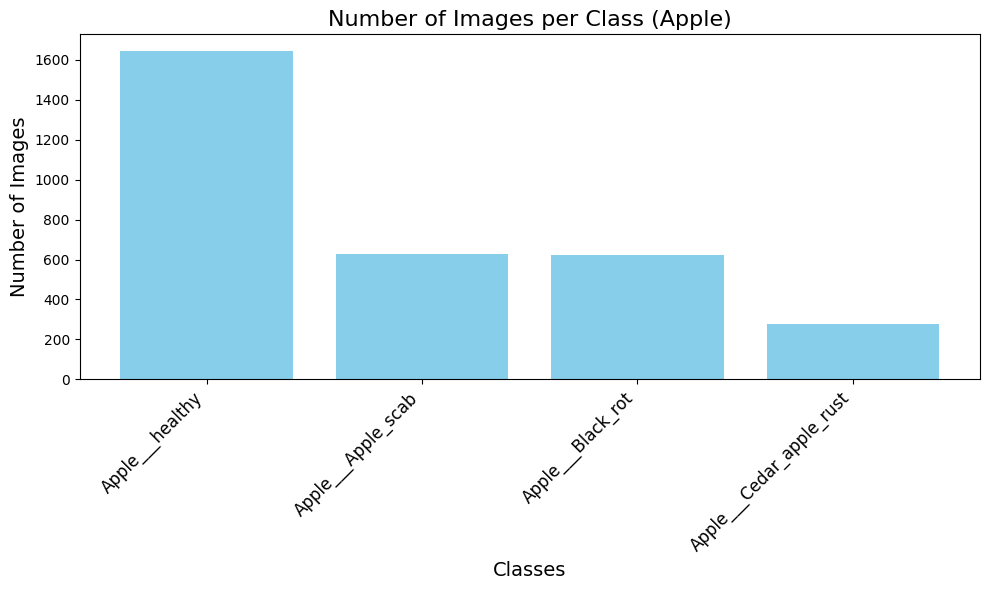

In [ ]:
import os
import matplotlib.pyplot as plt



# Fetch class names starting with "Apple"
apple_classes = [folder for folder in os.listdir(image_dir)
                 if os.path.isdir(os.path.join(image_dir, folder)) and folder.startswith("Apple")]

# Count the number of images in each class
class_image_counts = {}
for class_name in apple_classes:
    class_path = os.path.join(image_dir, class_name)
    num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    class_image_counts[class_name] = num_images
    print(class_name,num_images)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values(), color='skyblue')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Number of Images per Class (Apple)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


On a compté pour chaque classe combien d'image contient , et comme l'histogramme montre que le nombre d'image n'est pas equilibrée et la diffrence est plus grand qui vas influence le modele cela necissite un balancement ou une augmentation de données

#**Data Segmentation & Data augmentation**

##**Data Augmentation**

In [ ]:
import os
import numpy as np
from PIL import Image
from imgaug import augmenters as iaa
from tqdm import tqdm
import random

# Chemin vers les images
image_dir = '/content/images/plantvillage dataset/color'

# Extensions d'images valides
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Trouver le nombre d'images par classe
class_counts = {}
for folder in os.listdir(image_dir):
    if folder.startswith("Apple"):  # Filtrer uniquement les classes liées à Apple
        folder_path = os.path.join(image_dir, folder)
        images = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_extensions]
        class_counts[folder] = len(images)

# Déterminer le nombre maximal d'images parmi les classes
max_images = max(class_counts.values())

# Définir les augmentations à appliquer
augmenters = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontal avec une probabilité de 50%
    iaa.Affine(rotate=(-20, 20)),  # Rotation entre -20° et 20°
    iaa.AdditiveGaussianNoise(scale=(10, 30)),  # Ajout de bruit gaussien
    iaa.Multiply((0.8, 1.2)),  # Éclaircissement ou assombrissement
])

# Équilibrer les classes
for folder, count in tqdm(class_counts.items(), desc="Équilibrage des classes"):
    folder_path = os.path.join(image_dir, folder)
    images = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_extensions]

    # Charger toutes les images originales de cette classe
    loaded_images = [np.array(Image.open(os.path.join(folder_path, img))) for img in images]

    # Générer des images pour atteindre le nombre `max_images`
    num_to_generate = max_images - count
    for i in range(num_to_generate):
        # Sélectionner une image aléatoire à augmenter
        img = random.choice(loaded_images)  # Correction ici
        augmented_img = augmenters.augment_image(img)

        # Sauvegarder l'image augmentée
        output_path = os.path.join(folder_path, f"augmented_{i + count}.jpg")
        Image.fromarray(augmented_img).save(output_path)

print("Équilibrage terminé. Toutes les classes ont maintenant le même nombre d'images.")


Équilibrage des classes: 100%|██████████| 4/4 [00:26<00:00,  6.56s/it]

Équilibrage terminé. Toutes les classes ont maintenant le même nombre d'images.


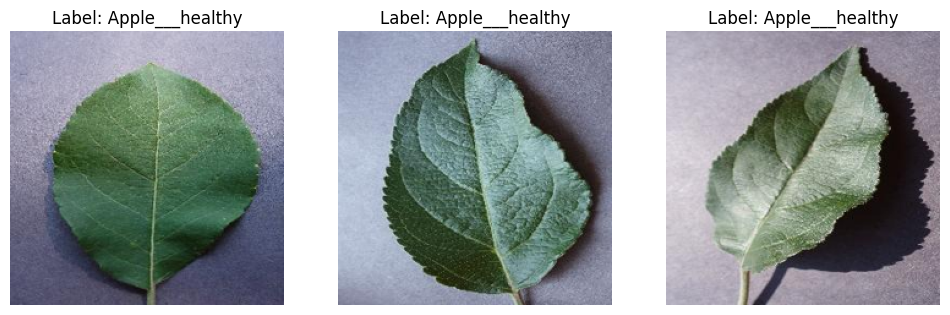

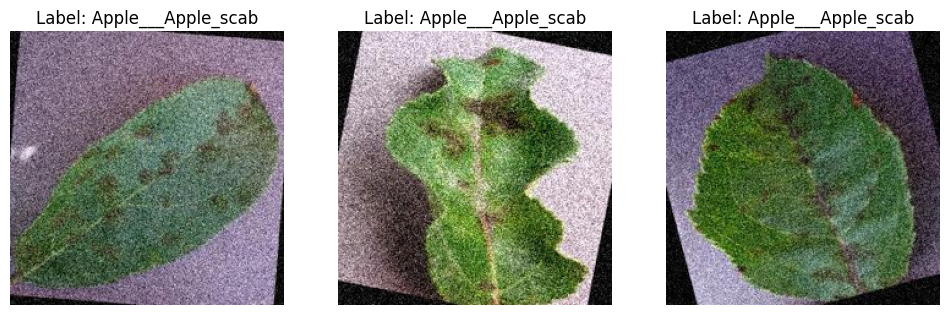

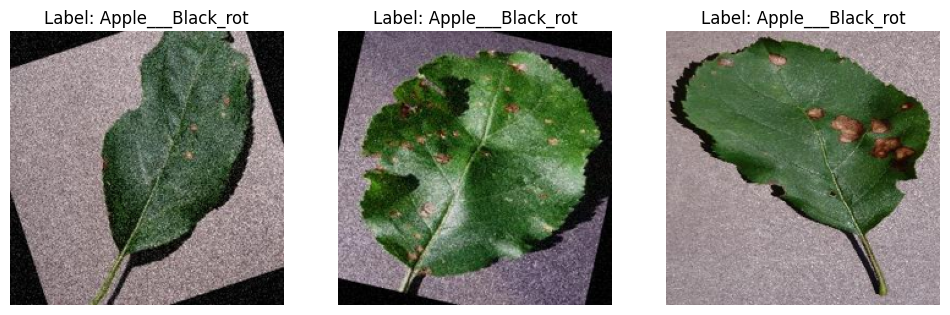

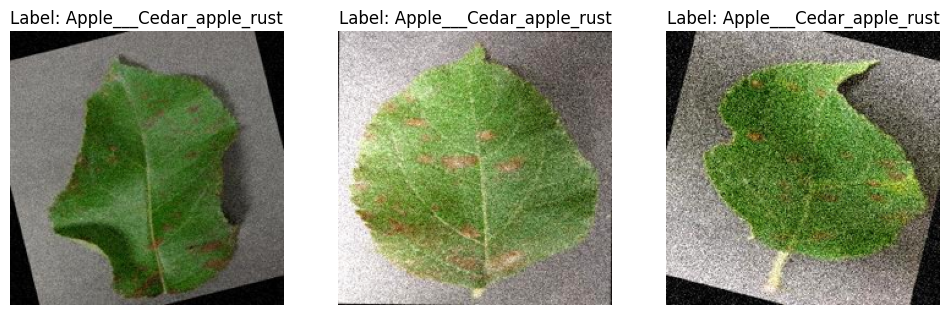

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Define the directory where your images are located
#image_dir = '/content/split_dataset1/segmented_dataset2'

# Define valid image extensions
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Loop through all subdirectories (which represent classes) and filter for those starting with "Tomato"
for folder in os.listdir(image_dir):
    if folder.startswith("Apple"):  # Filter only folders that start with "Apple"
        folder_path = os.path.join(image_dir, folder)

        # Get all image files in the folder
        images = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_extensions]

        # Pick only the first 3 images (you can change this to random if preferred)
        selected_images = images[:3]

        # Create a plot for the 3 images
        plt.figure(figsize=(12, 4))

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(folder_path, img_name)

            # Open the image and resize it
            with Image.open(img_path) as img:
                img_resized = img.resize((224, 224))
                img_array = np.array(img_resized)

            # Create a subplot for each image
            plt.subplot(1, 3, i + 1)
            plt.imshow(img_array)
            plt.title(f"Label: {folder}")
            plt.axis('off')  # Hide axis

        # Show the images for this class
        plt.show()


Apple___healthy 1645
Apple___Apple_scab 1645
Apple___Black_rot 1645
Apple___Cedar_apple_rust 1645


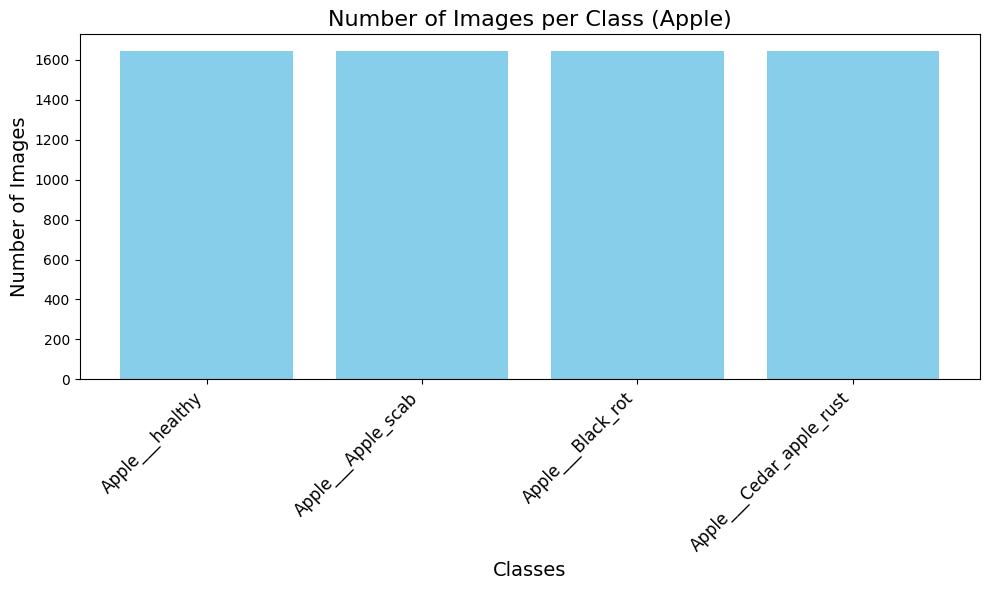

In [ ]:
import os
import matplotlib.pyplot as plt



# Fetch class names starting with "Apple"
apple_classes = [folder for folder in os.listdir(image_dir)
                 if os.path.isdir(os.path.join(image_dir, folder)) and folder.startswith("Apple")]

# Count the number of images in each class
class_image_counts = {}
for class_name in apple_classes:
    class_path = os.path.join(image_dir, class_name)
    num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    class_image_counts[class_name] = num_images
    print(class_name,num_images)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values(), color='skyblue')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Number of Images per Class (Apple)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


##**Image Segmentation in order to delete the background:**

###**Segmentation par contour actif:**

In [ ]:
import cv2
import numpy as np
import os

# Function to segment leaves using color and contours
def segment_leaf_color_contour(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define HSV color range for leaf segmentation
    lower_bound = np.array([25, 40, 40])  # Adjust these values (example: green range)
    upper_bound = np.array([85, 255, 255])

    # Create a binary mask for the color range
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Perform morphological operations to clean the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours from the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on size and create a refined mask
    refined_mask = np.zeros_like(mask)
    for cnt in contours:
        if cv2.contourArea(cnt) > 1000:  # Filter small contours
            cv2.drawContours(refined_mask, [cnt], -1, 255, -1)

    # Apply the refined mask to the original image
    segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=refined_mask)

    return segmented

# output directories

output_dir = '/content/segmented_dataset2'  # Path to save segmented images

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process all classes and images
for class_name in os.listdir(image_dir):
    class_path = os.path.join(image_dir, class_name)
    if os.path.isdir(class_path):  # Check if it is a directory
        # Create a corresponding output directory
        class_output_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_output_dir, exist_ok=True)

        # Process all images in the class directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if os.path.isfile(image_path):
                try:
                    # Segment the image
                    segmented = segment_leaf_color_contour(image_path)

                    # Save the segmented image
                    output_path = os.path.join(class_output_dir, image_name)
                    cv2.imwrite(output_path, cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))
                except Exception as e:
                    print(f"Failed to process {image_path}: {e}")

print("Segmentation complete. Segmented images are saved in:", output_dir)


Segmentation complete. Segmented images are saved in: /content/segmented_dataset2


Affichage de résultat de la segmenation par contour actif :

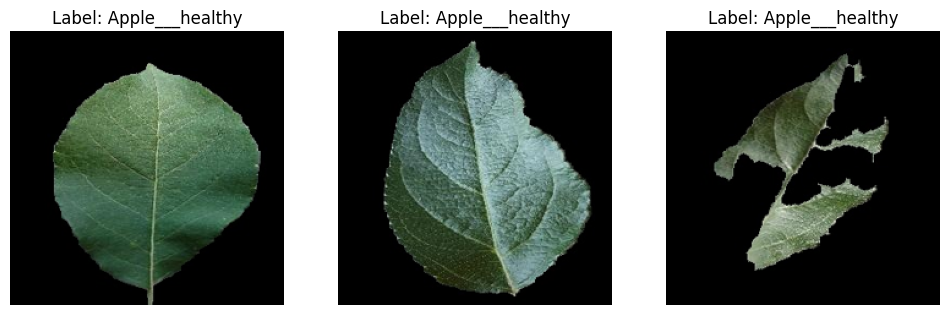

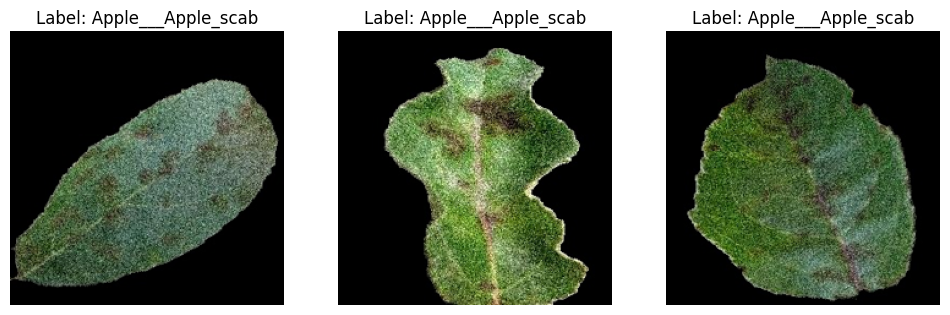

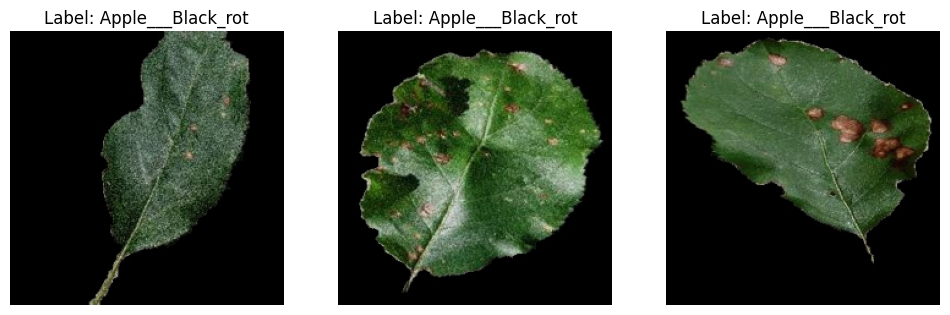

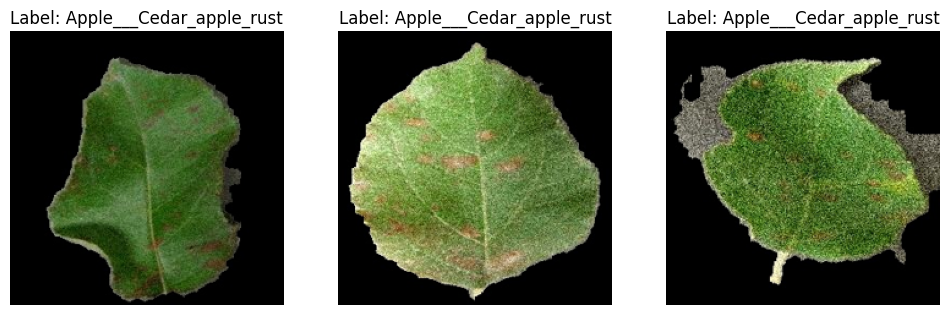

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Define the directory where your images are located
image_dir3 = '/content/segmented_dataset2'

# Define valid image extensions
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Loop through all subdirectories (which represent classes) and filter for those starting with "Tomato"
for folder in os.listdir(image_dir3):
    if folder.startswith("Apple"):  # Filter only folders that start with "Apple"
        folder_path = os.path.join(image_dir3, folder)

        # Get all image files in the folder
        images = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_extensions]

        # Pick only the first 3 images (you can change this to random if preferred)
        selected_images = images[:3]

        # Create a plot for the 3 images
        plt.figure(figsize=(12, 4))

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(folder_path, img_name)

            # Open the image and resize it
            with Image.open(img_path) as img:
                img_resized = img.resize((224, 224))
                img_array = np.array(img_resized)

            # Create a subplot for each image
            plt.subplot(1, 3, i + 1)
            plt.imshow(img_array)
            plt.title(f"Label: {folder}")
            plt.axis('off')  # Hide axis

        # Show the images for this class
        plt.show()


###SEGMENTATION avec la methode de watershaed:

In [ ]:
import cv2
import numpy as np
import os

# Function to segment leaves using the Watershed algorithm
def segment_leaf_watershed(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to create an initial mask
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Noise removal using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Distance transform and marking
    dist_transform = cv2.distanceTransform(cleaned, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(cleaned, sure_fg)

    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply Watershed
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

    # Create a mask for the segmented regions
    segmented_mask = (markers > 1).astype(np.uint8) * 255
    segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=segmented_mask)

    return segmented

# Input and output directories
  # Path to the dataset with images
output_dir = '/content/split_dataset1/segmented_dataset'  # Path to save segmented images

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process all classes and images that start with "apple"
for class_name in os.listdir(image_dir):
    class_path = os.path.join(image_dir, class_name)
    if os.path.isdir(class_path):  # Check if it is a directory
        # Create a corresponding output directory
        class_output_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_output_dir, exist_ok=True)

        # Process all images in the class directory that start with "apple"
        for image_name in os.listdir(class_path):
            if image_name.startswith("apple"):  # Check if the image name starts with "apple"
                image_path = os.path.join(class_path, image_name)
                if os.path.isfile(image_path):
                    try:
                        # Segment the image
                        segmented = segment_leaf_watershed(image_path)

                        # Save the segmented image
                        output_path = os.path.join(class_output_dir, image_name)
                        cv2.imwrite(output_path, cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))
                    except Exception as e:
                        print(f"Failed to process {image_path}: {e}")

print("Segmentation complete. Segmented images are saved in:", output_dir)


Segmentation complete. Segmented images are saved in: /content/split_dataset1/segmented_dataset


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Define the directory where your images are located
image_dir2 = '/content/split_dataset1/segmented_dataset'

# Define valid image extensions
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Loop through all subdirectories (which represent classes) and filter for those starting with "Tomato"
for folder in os.listdir(image_dir2):
    if folder.startswith("Apple"):  # Filter only folders that start with "Apple"
        folder_path = os.path.join(image_dir2, folder)

        # Get all image files in the folder
        images = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_extensions]

        # Pick only the first 3 images (you can change this to random if preferred)
        selected_images = images[:3]

        # Create a plot for the 3 images
        plt.figure(figsize=(12, 4))

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(folder_path, img_name)

            # Open the image and resize it
            with Image.open(img_path) as img:
                img_resized = img.resize((224, 224))
                img_array = np.array(img_resized)

            # Create a subplot for each image
            plt.subplot(1, 3, i + 1)
            plt.imshow(img_array)
            plt.title(f"Label: {folder}")
            plt.axis('off')  # Hide axis

        # Show the images for this class
        plt.show()


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

##Echantillonage d'images segmentées:

In [ ]:
import cv2
import os

# Function to resize images
def resize_image(image_path, output_path, size=(128, 128)):
    # Read the image
    image = cv2.imread(image_path)

    # Resize the image
    resized_image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)

    # Save the resized image
    cv2.imwrite(output_path, resized_image)

# Input and output directories
input_dir = '/content/segmented_dataset2'  # Path to original images
output_dir = '/content/resized_dataset'  # Path to save resized images

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process all classes and images
for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    if os.path.isdir(class_path):
        # Create corresponding output directory
        class_output_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_output_dir, exist_ok=True)

        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            output_path = os.path.join(class_output_dir, image_name)
            if os.path.isfile(image_path):
                try:
                    # Resize the image
                    resize_image(image_path, output_path)
                except Exception as e:
                    print(f"Failed to process {image_path}: {e}")

print("Resizing complete. Resized images are saved in:", output_dir)


Resizing complete. Resized images are saved in: /content/resized_dataset


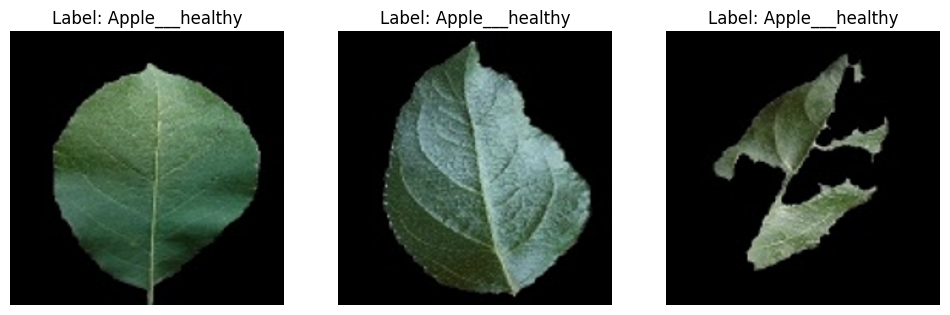

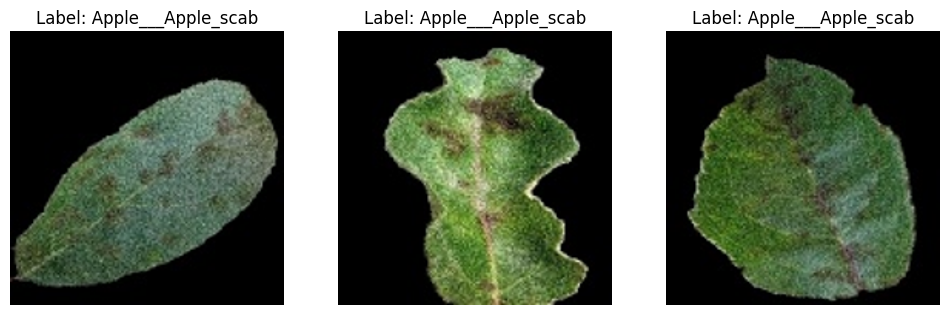

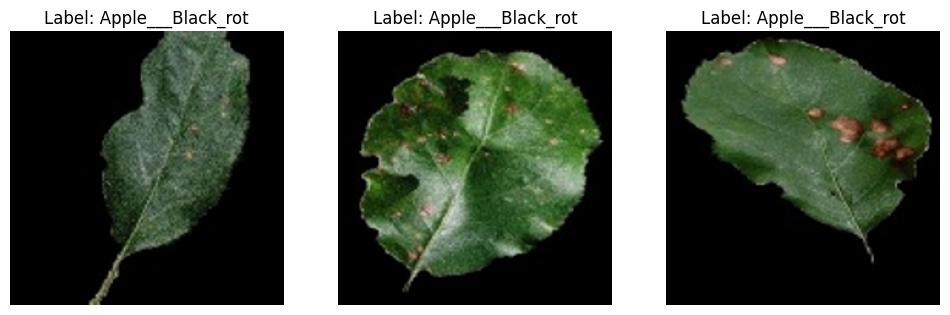

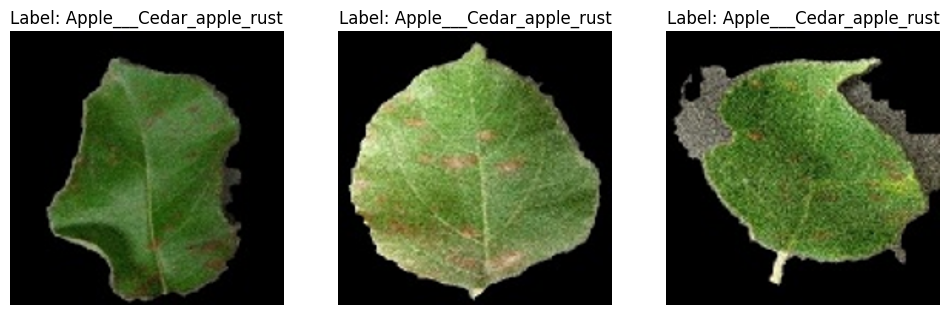

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Define the directory where your images are located
image_dir = '/content/resized_dataset'

# Define valid image extensions
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Loop through all subdirectories (which represent classes) and filter for those starting with "Tomato"
for folder in os.listdir(image_dir):
    if folder.startswith("Apple"):  # Filter only folders that start with "Apple"
        folder_path = os.path.join(image_dir, folder)

        # Get all image files in the folder
        images = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_extensions]

        # Pick only the first 3 images (you can change this to random if preferred)
        selected_images = images[:3]

        # Create a plot for the 3 images
        plt.figure(figsize=(12, 4))

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(folder_path, img_name)

            # Open the image and resize it
            with Image.open(img_path) as img:
                img_resized = img.resize((224, 224))
                img_array = np.array(img_resized)

            # Create a subplot for each image
            plt.subplot(1, 3, i + 1)
            plt.imshow(img_array)
            plt.title(f"Label: {folder}")
            plt.axis('off')  # Hide axis

        # Show the images for this class
        plt.show()


##Split the data into train and test:

In [ ]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Paths to the dataset and the destination directories
dataset_path = '/content/resized_dataset'
train_dir = '/content/split_dataset/train'
test_dir = '/content/split_dataset/test'

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all class subdirectories in the dataset
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Initialize lists to hold images for splitting
all_images = []

# Collect images from each class subdirectory
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]
    all_images.extend([(img, class_folder) for img in images])

# Split the dataset into train and test sets (80% for training, 20% for testing)
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

# Function to move images to respective directories
def move_images(images_list, target_dir):
    for img, class_folder in images_list:
        # Create class subfolder in train/test directories if it doesn't exist
        class_target_dir = os.path.join(target_dir, class_folder)
        os.makedirs(class_target_dir, exist_ok=True)

        # Move the image to the corresponding subdirectory
        shutil.move(img, os.path.join(class_target_dir, os.path.basename(img)))

# Move training images to the train directory
move_images(train_images, train_dir)

# Move testing images to the test directory
move_images(test_images, test_dir)

# Print the number of images in train and test sets
print(f"Dataset split completed: {len(train_images)} training images and {len(test_images)} testing images.")


Dataset split completed: 46171 training images and 11543 testing images.


#**Model Building for classification:**

##**1.CNN**

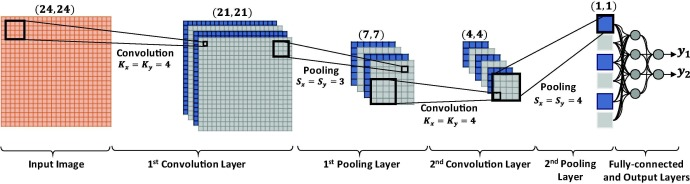

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

# Define the directory where your images are located
image_dir = '/content/split_dataset/train'

# Define valid image extensions
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Prepare data arrays
images = []
labels = []
class_names = []  # to store class names

# Loop through all subdirectories (which represent classes) and load images
for folder in os.listdir(image_dir):
    if folder.startswith("Apple"):  # Filter for specific classes (e.g., "Apple")
        folder_path = os.path.join(image_dir, folder)
        class_names.append(folder)

        # Get all image files in the folder
        image_files = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_extensions]

        # Limit the number of images to 500 per class
        image_files = random.sample(image_files, min(500, len(image_files)))

        for img_name in image_files:
            img_path = os.path.join(folder_path, img_name)

            # Open and resize the image
            with Image.open(img_path) as img:
                img_resized = img.resize((224, 224))  # Resize to fit CNN input size
                img_array = np.array(img_resized)

            images.append(img_array)
            labels.append(folder)  # The folder name is the label

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the images (scale pixel values to 0-1)
images = images / 255.0

# Convert labels to numerical format (e.g., one-hot encoding)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Check the class distribution
unique_classes, counts = np.unique(labels_encoded, return_counts=True)
print("Class distribution in training set:")
for class_name, count in zip(unique_classes, counts):
    print(f"Class {label_encoder.inverse_transform([class_name])[0]}: {count} images")


Class distribution in training set:
Class Apple___Apple_scab: 500 images
Class Apple___Black_rot: 500 images
Class Apple___Cedar_apple_rust: 500 images
Class Apple___healthy: 500 images


In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),  # Input layer (224x224 RGB image)
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # Convolution layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Flatten the output for the fully connected layers
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(len(class_names), activation='softmax')  # Output layer (one per class)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.5074 - loss: 1.1637 - val_accuracy: 0.7775 - val_loss: 0.6975
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 257s 5s/step - accuracy: 0.8183 - loss: 0.5595 - val_accuracy: 0.8500 - val_loss: 0.4964
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.8917 - loss: 0.2982 - val_accuracy: 0.7825 - val_loss: 0.5749
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.9507 - loss: 0.1610 - val_accuracy: 0.8325 - val_loss: 0.6391
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 244s 5s/step - accuracy: 0.9782 - loss: 0.0691 - val_accuracy: 0.8325 - val_loss: 0.7292
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.8425 - val_loss: 0.8587
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.9945 - loss: 0.0160 - val_accuracy: 0.7750 - val_loss: 1.2075
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.9822 - loss: 0.0524 - val_accuracy: 0.8525 - v

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_acc}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8124 - loss: 1.2533
Test accuracy: 0.8125


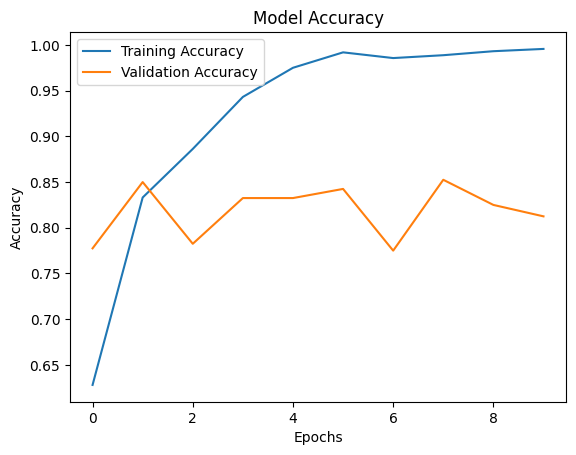

In [ ]:
# Plot training & validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()


D'apres le diagrammes ci dessous on s'arrete à la 3 eme epoch

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Image: b5bd9505-7491-4ff6-a703-d87b4f5db18b___RS_HL 6223.JPG
Real Class: Apple___healthy
Predicted Class: Apple___healthy
----------------------------------------


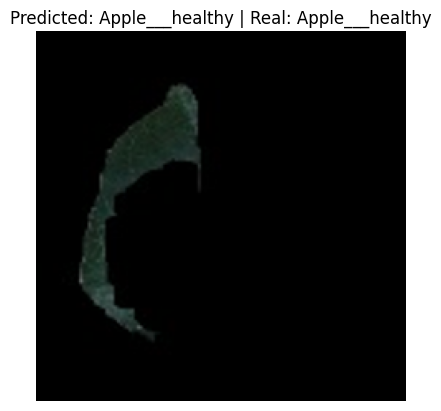

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Image: 62d3964c-3cc9-495c-94d5-0558f5fe3063___RS_HL 7607.JPG
Real Class: Apple___healthy
Predicted Class: Apple___healthy
----------------------------------------


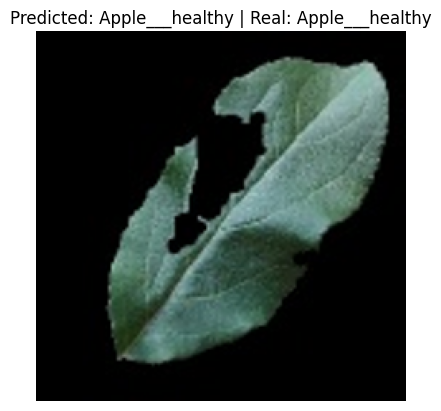

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step  
Image: augmented_1420.jpg
Real Class: Apple___Apple_scab
Predicted Class: Apple___Apple_scab
----------------------------------------


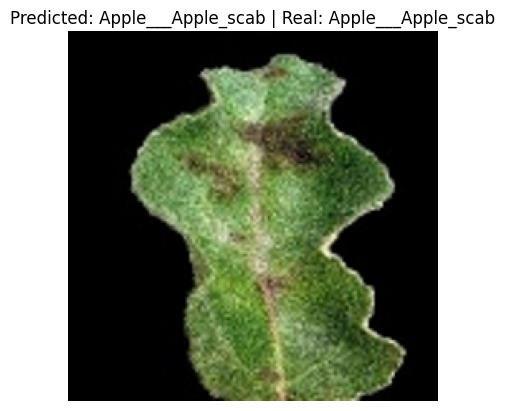

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: 0db71c1d-93d7-4481-b0d0-b73f995131a9___FREC_Scab 2976.JPG
Real Class: Apple___Apple_scab
Predicted Class: Apple___Apple_scab
----------------------------------------


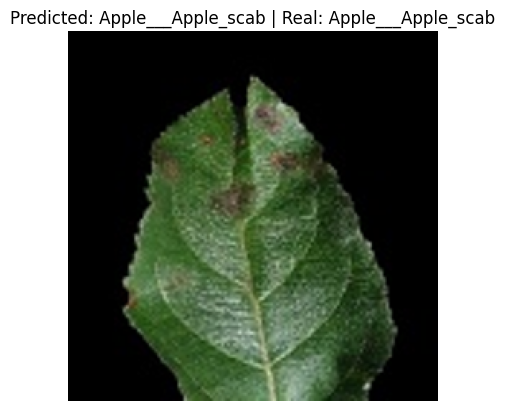

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: augmented_1420.jpg
Real Class: Apple___Black_rot
Predicted Class: Apple___Black_rot
----------------------------------------


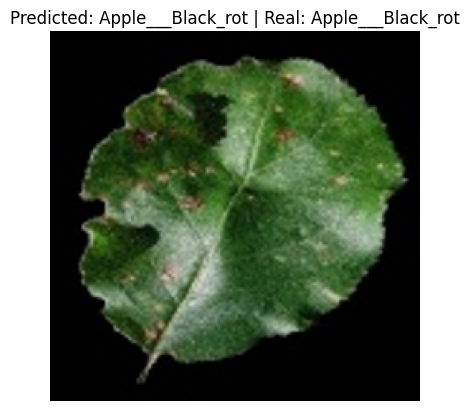

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Image: ca07e05a-e6a2-4651-b4fd-e54f0d1c58b7___JR_FrgE.S 2840.JPG
Real Class: Apple___Black_rot
Predicted Class: Apple___Black_rot
----------------------------------------


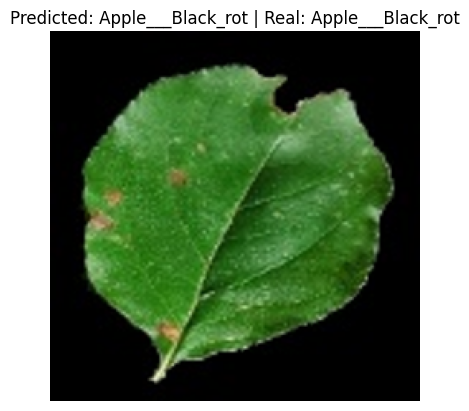

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: 56cc0223-46b0-44d3-ba43-66d3def44f1d___FREC_C.Rust 3834.JPG
Real Class: Apple___Cedar_apple_rust
Predicted Class: Apple___Cedar_apple_rust
----------------------------------------


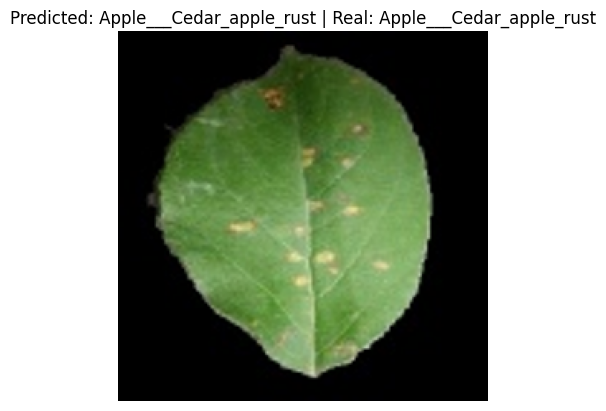

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Image: 96a1d021-2c27-46a0-9891-41e449e4910e___FREC_C.Rust 3610.JPG
Real Class: Apple___Cedar_apple_rust
Predicted Class: Apple___Black_rot
----------------------------------------


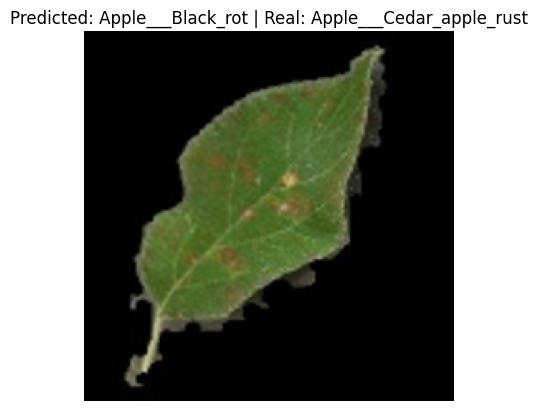

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def predict_image_class(uploaded_image_path, model, label_encoder):
    """
    This function accepts an image path, preprocesses the image, and returns the predicted class.

    Parameters:
    - uploaded_image_path: Path to the uploaded image
    - model: The trained CNN model
    - label_encoder: Label encoder used to encode class labels

    Returns:
    - predicted_class: The predicted class name
    """
    # Load and preprocess the image
    img = Image.open(uploaded_image_path).resize((224, 224))  # Resize to 224x224
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class using the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)  # Get the index of the highest probability
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]  # Decode the predicted class

    return predicted_class, img

def test_images_in_test_set(test_image_dir, model, label_encoder, num_images_per_class=2):
    """
    This function processes and predicts the classes for 2 images from each class in the test set that start with 'Apple'.
    It shows the predicted and real classes for each image.

    Parameters:
    - test_image_dir: Path to the test images directory
    - model: The trained CNN model
    - label_encoder: Label encoder used to encode class labels
    - num_images_per_class: Number of images to process per class
    """
    # Loop through all subdirectories (representing classes) and process images
    for folder in os.listdir(test_image_dir):
        if folder.startswith("Apple"):  # Filter classes that start with "Apple"
            folder_path = os.path.join(test_image_dir, folder)

            # Get all image files in the folder
            image_files = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}]

            # Process and predict for the first `num_images_per_class` images
            for img_name in image_files[:num_images_per_class]:
                img_path = os.path.join(folder_path, img_name)

                # Get the real class (folder name)
                real_class = folder

                # Predict the class
                predicted_class, img = predict_image_class(img_path, model, label_encoder)

                # Print real and predicted classes
                print(f"Image: {img_name}")
                print(f"Real Class: {real_class}")
                print(f"Predicted Class: {predicted_class}")
                print("-" * 40)

                # Plot the image with the predicted class
                plt.imshow(img)
                plt.title(f"Predicted: {predicted_class} | Real: {real_class}")
                plt.axis('off')
                plt.show()

# Example usage (replace with your own image directory and trained model):
test_image_dir = '/content/split_dataset/test'

test_images_in_test_set(test_image_dir, model, label_encoder, num_images_per_class=2)


##EVALUATION de modele


13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step


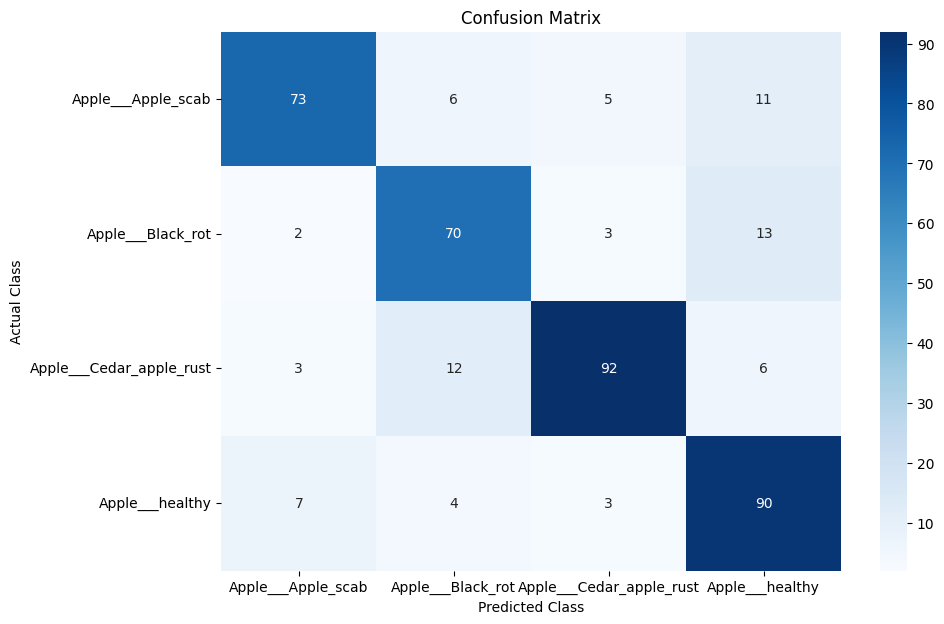

Classification Report:
 {'Apple___Apple_scab': {'precision': 0.8588235294117647, 'recall': 0.7684210526315789, 'f1-score': 0.8111111111111111, 'support': 95.0}, 'Apple___Black_rot': {'precision': 0.7608695652173914, 'recall': 0.7954545454545454, 'f1-score': 0.7777777777777778, 'support': 88.0}, 'Apple___Cedar_apple_rust': {'precision': 0.8932038834951457, 'recall': 0.8141592920353983, 'f1-score': 0.8518518518518519, 'support': 113.0}, 'Apple___healthy': {'precision': 0.75, 'recall': 0.8653846153846154, 'f1-score': 0.8035714285714286, 'support': 104.0}, 'accuracy': 0.8125, 'macro avg': {'precision': 0.8157242445310754, 'recall': 0.8108548763765345, 'f1-score': 0.8110780423280424, 'support': 400.0}, 'weighted avg': {'precision': 0.8186919896704988, 'recall': 0.8125, 'f1-score': 0.8133267195767196, 'support': 400.0}}


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def evaluate_model_performance(model, X_test, y_test, label_encoder):
    # Predicting on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the prediction to class labels

    # Convert true labels to class names
    true_labels = label_encoder.inverse_transform(y_test)

    # Generate classification report
    report = classification_report(true_labels, label_encoder.inverse_transform(y_pred_classes), output_dict=True)

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, label_encoder.inverse_transform(y_pred_classes))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

    return report, cm

# Example usage with your test data
report, cm = evaluate_model_performance(model, X_val, y_val, label_encoder)

# Print the classification report
print("Classification Report:\n", report)


La matrice de confusion présentée permet d’évaluer les performances d’un modèle de classification en comparant les classes réelles (lignes) aux classes prédites (colonnes). Voici une analyse détaillée :

Aperçu des Classes
Le modèle essaie de classer des images (ou données) en quatre catégories :

Apple___Apple_scab (Tavelure du pommier)
Apple___Black_rot (Pourriture noire)
Apple___Cedar_apple_rust (Rouille du pommier)
Apple___healthy (Pommier sain)
Interprétation de la Matrice
1. Éléments Diagonaux (Prédictions Correctes)
Apple___Apple_scab : 70 échantillons correctement classifiés.
Apple___Black_rot : 82 échantillons correctement classifiés.
Apple___Cedar_apple_rust : 101 échantillons correctement classifiés.
Apple___healthy : 88 échantillons correctement classifiés.
2. Éléments Hors Diagonale (Erreurs de Classification)
Apple___Apple_scab :

Classé à tort comme Black_rot : 2 fois.
Classé à tort comme Cedar_apple_rust : 8 fois.
Classé à tort comme healthy : 15 fois.
Apple___Black_rot :

Classé à tort comme Apple_scab : 3 fois.
Classé à tort comme Cedar_apple_rust : 3 fois.
Apple___Cedar_apple_rust :

Classé à tort comme Apple_scab : 8 fois.
Classé à tort comme Black_rot : 2 fois.
Classé à tort comme healthy : 2 fois.
Apple___healthy :

Classé à tort comme Apple_scab : 8 fois.
Classé à tort comme Black_rot : 6 fois.
Classé à tort comme Cedar_apple_rust : 2 fois.
Analyse des Performances du Modèle
1. Forces du Modèle :
La classe Cedar_apple_rust est celle où le modèle est le plus performant, avec 101 prédictions correctes et très peu d’erreurs (seulement 12 au total).
La classe healthy est également bien classifiée, avec 88 prédictions correctes et un faible taux d’erreur.
2. Faiblesses du Modèle :
La classe Apple_scab est la plus problématique avec un grand nombre de mauvaises classifications, notamment en tant que healthy (15 fois).
Certaines confusions entre Apple_scab et Black_rot peuvent être dues à des similitudes visuelles ou caractéristiques communes.
3. Causes Possibles des Erreurs :
Similarités entre classes : Les caractéristiques visuelles ou les données utilisées pour Apple_scab et healthy pourraient être très similaires, rendant la différenciation difficile.
Déséquilibre des données : Si certaines classes (comme Apple_scab) ont moins d'échantillons dans le jeu d'entraînement, cela peut expliquer les erreurs fréquentes.


13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


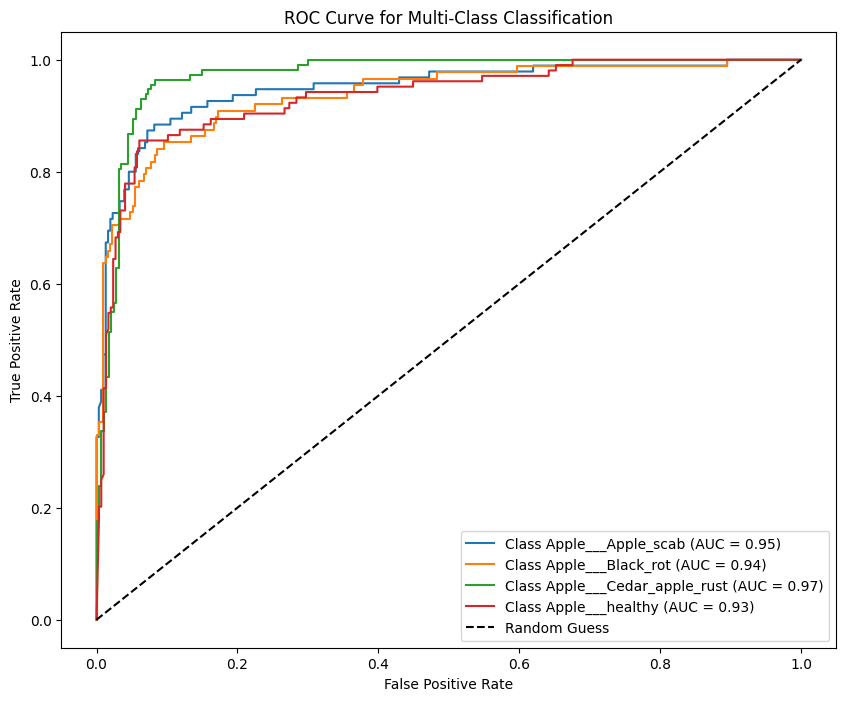

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve(model, X_test, y_test, label_encoder):
    # Binarize the labels for multi-class classification
    y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

    # Get model predictions for all classes
    y_pred = model.predict(X_test)

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title('ROC Curve for Multi-Class Classification')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
plot_roc_curve(model, X_val, y_val, label_encoder)


* La courbe ROC (Receiver Operating Characteristic) permet d’évaluer les performances d’un modèle de classification multi-classe en mesurant le compromis entre le taux de vrais positifs (True Positive Rate ou TPR) et le taux de faux positifs (False Positive Rate ou FPR). Voici une analyse détaillée de votre graphique :

* Interprétation des Résultats
Aire sous la courbe (AUC - Area Under the Curve) :

* Apple___Apple_scab : AUC = 0.92
Performance respectable, le modèle distingue bien cette classe des autres, bien qu’il y ait un léger espace d’amélioration.
* Apple___Black_rot : AUC = 0.99
Excellente performance. Le modèle identifie presque parfaitement cette classe.
* Apple___Cedar_apple_rust : AUC = 0.98
Performance proche de l’optimum. Le modèle différencie cette classe avec une très grande précision.
* Apple___healthy : AUC = 0.95
Bonne performance, mais un peu en deçà de Black_rot et Cedar_apple_rust.
Comparaison des Classes :

Black_rot et Cedar_apple_rust affichent les meilleures performances, ce qui indique que ces classes ont des caractéristiques bien définies et que le modèle les distingue très facilement.
Apple_scab est la classe la plus difficile à différencier, ce qui correspond également aux observations issues de la matrice de confusion.
* La ligne en pointillés (Random Guess) :

Cette ligne représente une classification aléatoire (AUC = 0.5). Toutes les courbes sont bien au-dessus de cette ligne, ce qui montre que le modèle est bien meilleur qu’une simple devinette aléatoire.
Distance par rapport à l’axe Y :

Plus une courbe est proche de l’axe Y (taux de vrais positifs élevé pour un faible taux de faux positifs), plus la classe correspondante est facilement discriminée.


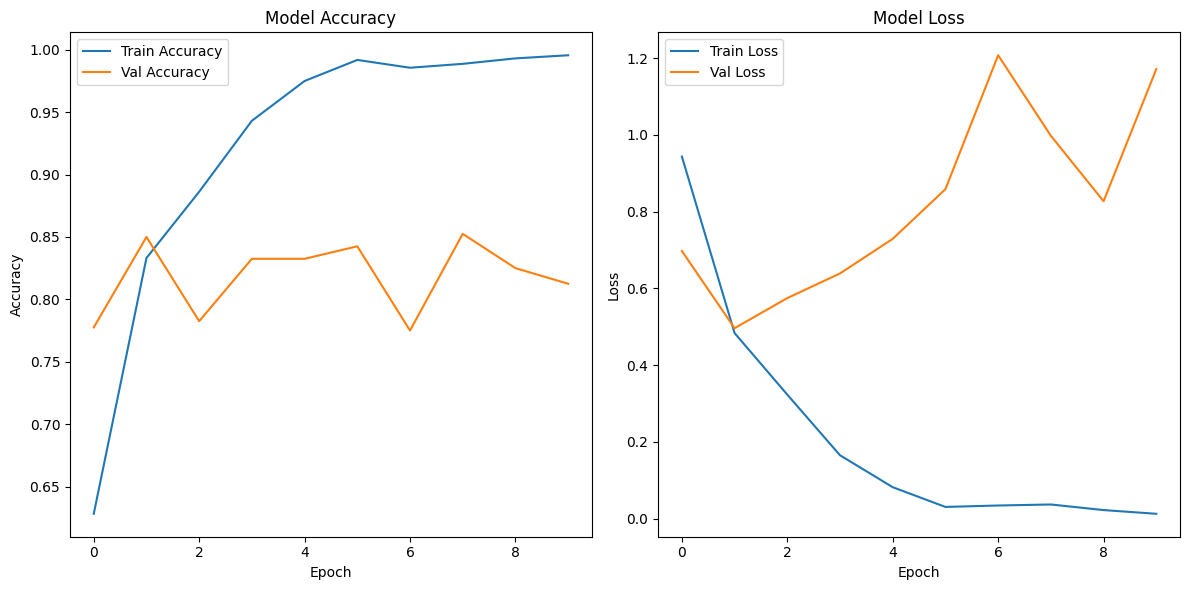

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage (replace with your training history object)
plot_training_history(history)
